## 일요일만 제외한 분석

In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [109]:
all= pd.read_csv('all.csv')

In [110]:
all=all.drop([118,72,73,74,60])

In [111]:
all=all.drop([112,105,98,91,78,71,64,57,50,43,36,1,8,15,22,29,])

In [112]:
all

,ACCOUNTDATE,CNT
0,2018-04-30,223
2,2018-04-28,130
3,2018-04-27,183
4,2018-04-26,169
5,2018-04-25,169
6,2018-04-24,169
7,2018-04-23,209
9,2018-04-21,111
10,2018-04-20,184
11,2018-04-19,166


In [113]:
train=all[(all['ACCOUNTDATE']>='2018-01-02')&(all['ACCOUNTDATE']<='2018-03-30')]
test=all[(all['ACCOUNTDATE']>='2018-04-02')&(all['ACCOUNTDATE']<='2018-04-30')]

In [98]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

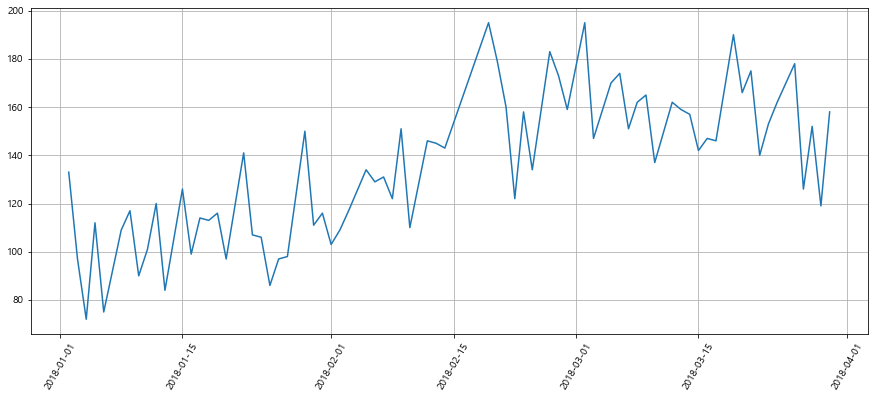

In [99]:
fig = plt.figure(figsize=(15, 6)) 
plt.plot(train)
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [100]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller
y = train['CNT']
y_1diff = train.diff().dropna()['CNT']
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y_1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

원 데이터 ADF Statistic: -0.183
원 데이터 p-value: 0.940
1차 차분 ADF Statistic: -8.442
1차 차분 p-value: 0.000


In [101]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [102]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 696.5756407182114
(0, 0, 1) 683.0839683953899
(0, 0, 2) 655.2405598826776
(0, 0, 3) 652.2366606231027
(0, 0, 4) 653.9862119062412
(0, 1, 0) 671.2958487965982
(0, 1, 1) 634.3903534131218
(0, 1, 2) 635.761849864311
(0, 1, 3) 631.5011714502596
(0, 1, 4) 632.4379934537526
(0, 2, 0) 741.7393162258302
(0, 2, 1) 669.1263929380135
(0, 2, 2) 634.8383463643452
(0, 2, 3) 636.3651236946985
(0, 2, 4) 632.8614514008408
(1, 0, 0) 666.5060817613265
(1, 0, 1) 646.3309447073508
(1, 0, 2) 647.3479112800547
(1, 0, 3) 1159.7146701483339
(1, 0, 4) 644.080162563553
(1, 1, 0) 643.6373987326592
(1, 1, 1) 635.5855982418257
(1, 1, 2) 634.5142900838953
(1, 1, 3) 636.4859775404127
(1, 1, 4) 635.5025864292784
(1, 2, 0) 684.7922895219479
(1, 2, 1) 642.8283706437526
(1, 2, 2) 635.9324546873854
(1, 2, 3) 635.0097723589056
(2, 0, 0) 649.6975394840615
(2, 0, 1) 647.080183015971
(2, 0, 2) 646.0886516551666
(2, 0, 3) 647.9624255614054
(2, 0, 4) 649.0622697211805
(2, 1, 0) 642.8673152494201
(2, 1, 1) 638.11942072

In [103]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [104]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   71
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -305.579
Method:                       css-mle   S.D. of innovations             17.544
Date:                Fri, 29 Oct 2021   AIC                            625.158
Time:                        17:28:32   BIC                            640.997
Sample:                             1   HQIC                           631.457
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.CNT     0.4638      0.216      2.151      0.032       0.041       0.886
ar.L2.D.CNT    -0.4389      0.168     -2.619      0.009      -0.767      -0.110
ma.L1.D.CNT    -1.3630      0.216     -6.308    

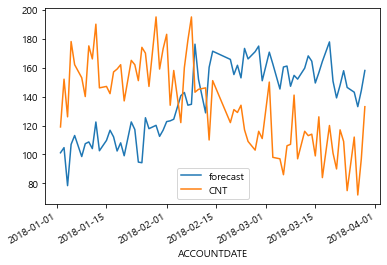

In [105]:
model = ARIMA(train, (2,1,4))
model_fit = model.fit(trend='nc',full_output=True,disp=1)
print(model_fit.summary())
model_fit.plot_predict()
plt.show()

In [106]:
forecast_data=model_fit.forecast(steps=10) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

In [107]:
pred_y 

[95.50650650508021,
 111.04969284523699,
 91.86208193577738,
 93.450555139926,
 102.60848562026382,
 106.15881288403989,
 103.78617469481871,
 101.12754307957664,
 100.93577805599894,
 102.01367503547021]

In [108]:
test_y

array([223, 130, 183, 169, 169, 169, 209, 111, 184, 166, 163, 156, 201,
       119, 139, 133, 175, 198, 190, 138, 149, 155, 173, 175, 168],
      dtype=int64)

In [117]:
from fbprophet import Prophet

In [114]:
train.columns=['ds','y']
test.columns=['ds','y']

In [115]:
train['ds']= pd.to_datetime(train['ds'])

In [118]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [119]:
future_data = prophet.make_future_dataframe(periods = 21, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(21)

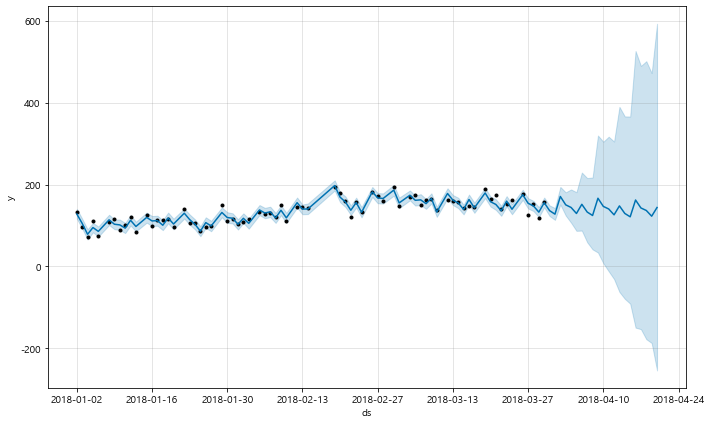

In [120]:
fig1=prophet.plot(forecast_data)

In [121]:
pred_y=a.yhat.values[0:21]
test_y=test.y.values[0:21]

In [122]:
pred_y #2018년4월2일 ~ 2018년4월30일0의 에측값

array([136.40269091, 127.81373079, 171.02372026, 150.61231909,
       144.17812721, 129.49151387, 151.90069189, 132.97743746,
       124.59260232, 166.69805137, 146.78909742, 140.50491403,
       126.18041929, 148.00235517, 129.55218401, 121.37147385,
       162.37238247, 142.96587574, 136.83170085, 122.86932471,
       144.10401845])

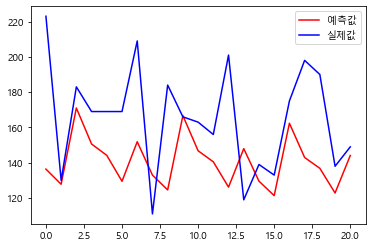

In [123]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) 

29.52957413514986